# Traffic Signs Classifier

link to dataset:  https://drive.google.com/file/d/1BGDHe6qQwrBEgnl-tXTSKo6TvDj8U3wS/view

In [ ]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf


In [2]:
tf.__version__

'2.3.0'

In [3]:
from PIL import Image

In [11]:
cd Traffic_sign_dataset

F:\Datasets\Traffic_sign_dataset


In [12]:
ls

 Volume in drive F is PERSONAL
 Volume Serial Number is 7EEE-8814

 Directory of F:\Datasets\Traffic_sign_dataset

23-01-2021  10:18    <DIR>          .
23-01-2021  10:18    <DIR>          ..
23-01-2021  09:58    <DIR>          Meta
13-10-2019  05:49             1,033 Meta.csv
23-01-2021  10:00    <DIR>          Test
13-10-2019  05:49           427,897 Test.csv
23-01-2021  10:09    <DIR>          Train
13-10-2019  05:50         1,940,896 Train.csv
               3 File(s)      2,369,826 bytes
               5 Dir(s)  60,240,916,480 bytes free


In [13]:
current_path = os.getcwd()
current_path

'F:\\Datasets\\Traffic_sign_dataset'

In [18]:
data = []
labels = []
classes = 42

In [19]:
for i in range(classes):
    path = os.path.join(current_path,'train',str(i))
    images = os.listdir(path)
    
    for image in images:
        try:
            image = Image.open(path+'\\'+image)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Image loading error!\n")
            
data = np.array(data)
labels = np.array(labels)

In [20]:
data.shape,labels.shape

((38969, 30, 30, 3), (38969,))

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,labels,test_size=0.2, random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(31175, 30, 30, 3) (7794, 30, 30, 3) (31175,) (7794,)


In [23]:
y_train[:5]

array([13, 11,  2, 12,  6])

In [24]:
y_train = tf.keras.utils.to_categorical(y_train,43)
y_test = tf.keras.utils.to_categorical(y_test,43)

In [38]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5) ,activation='relu',input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5) , activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3) ,activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3) , activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
epochs=15
history = model.fit(x_train,y_train, batch_size=64, epochs=epochs, validation_data=(x_test,y_test))

Epoch 1/15
488/488 [==============================] - 54s 110ms/step - loss: 1.7251 - accuracy: 0.5596 - val_loss: 0.4321 - val_accuracy: 0.9092
Epoch 2/15
488/488 [==============================] - 56s 114ms/step - loss: 0.4338 - accuracy: 0.8779 - val_loss: 0.1342 - val_accuracy: 0.9697
Epoch 3/15
488/488 [==============================] - 56s 115ms/step - loss: 0.2600 - accuracy: 0.9250 - val_loss: 0.0717 - val_accuracy: 0.9820
Epoch 4/15
488/488 [==============================] - 55s 112ms/step - loss: 0.2064 - accuracy: 0.9393 - val_loss: 0.0687 - val_accuracy: 0.9801
Epoch 5/15
488/488 [==============================] - 55s 113ms/step - loss: 0.1647 - accuracy: 0.9517 - val_loss: 0.0765 - val_accuracy: 0.9784
Epoch 6/15
488/488 [==============================] - 55s 112ms/step - loss: 0.1507 - accuracy: 0.9569 - val_loss: 0.0386 - val_accuracy: 0.9896
Epoch 7/15
488/488 [==============================] - 55s 112ms/step - loss: 0.1394 - accuracy: 0.9601 - val_loss: 0.0362 - val_ac

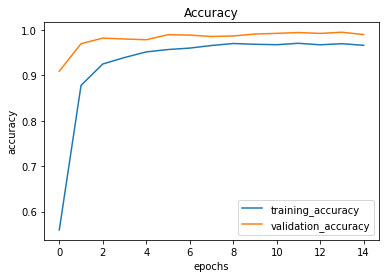

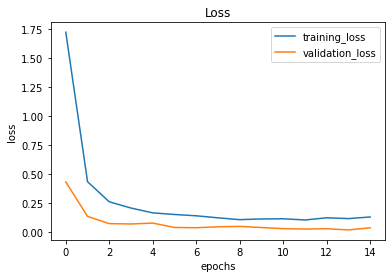

In [45]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [48]:
from sklearn.metrics import accuracy_score
import pandas as pd

yt_test = pd.read_csv('Test.csv')

yt_labels = yt_test["ClassId"].values
imgs = yt_test["Path"].values

datat = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    datat.append(np.array(image))
    
X_test = np.array(datat)

preds = model.predict_classes(X_test)

accuracy_score(yt_labels, preds)

0.9466349960411719

In [49]:
model.save('traffic_sign_classifier.h5')

In [50]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

In [61]:
def classify(file_path):
    image = Image.open(file_path)
    image1 = image.resize((30,30))
    image = np.expand_dims(image1, axis=0)
    image = np.array(image)
    pred = model.predict_classes([image])[0]
    plt.imshow(image1)
    sign = classes[pred+1]
    print(sign)

Speed limit (60km/h)


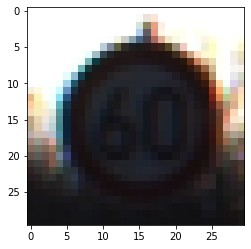

In [75]:
classify(imgs[96])

No passing


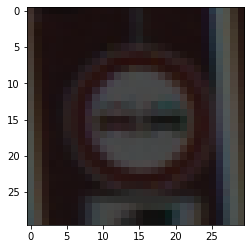

In [76]:
classify(imgs[639])

Keep right


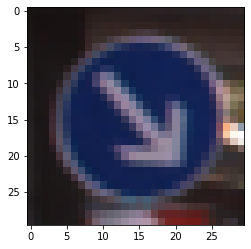

In [79]:
classify(imgs[5])

Speed limit (50km/h)


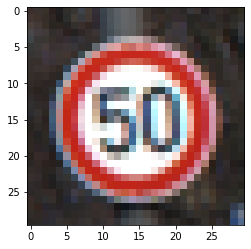

In [80]:
classify(imgs[1500])

Traffic signals


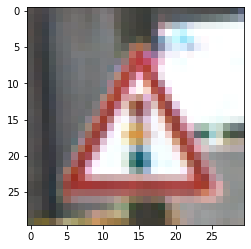

In [82]:
classify(imgs[5000])